In [2]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

we are taking IMDB dataset (related to movies reviews) which has both positive and negative sentiments.

as we talk about embeddings here every review converted to set of word embeddings if we prepare a data preparation. and each word represented by a fixed size vector because of semantic meaning relationship in continuous space.

In [3]:
from keras.layers import Embedding

#the below embedding layer requires two inputs: word index and embedding's dimensions
embedd_lay = Embedding(1000, 64)
from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences

***we will try to vary the training sample and by taking 100 as of in a custom embedding layer***

In [4]:
# we need to consider the only top 10000 words as features.
no_features = 10000
# as it says cutoff reviews is after 150 words
cutoff_length = 150

# Data loading to integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=no_features)

x_train = x_train[:100]
y_train = y_train[:100]

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
#integer lists are transformed into 2D tensor with shape of (samples, cutoff_length)
x_train = pad_sequences(x_train, maxlen=cutoff_length)
x_test = pad_sequences(x_test, maxlen=cutoff_length)
from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
#with the help of maximum length that is cutoff length input to the embedding layer we need to faltten the embedded inputs.
model1.add(Embedding(10000, 8, input_length= cutoff_length))
# After the Embedding layer, our activations have shape of `(samples, maxlen, 8)`.

# We need to convert to 2D from 3D Embeddings so that we will use flatten
model1.add(Flatten())

In [6]:
# By adding the classifier on top
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model1.summary()

history1 = model1.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
3/3 [==============================] - 1s 116ms/step - loss: 0.6942 - acc: 0.5250 - val_loss: 0.6884 - val_acc: 0.6500
Epoch 2/10
3/3 [==============================] - 0s 21ms/step - loss: 0.6700 - acc: 0.8250 - val_loss: 0.6875 - val_acc: 0.6500
Epoch 3/10
3/3 [=======

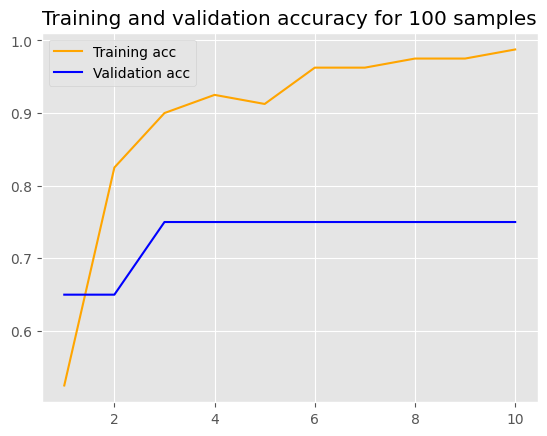

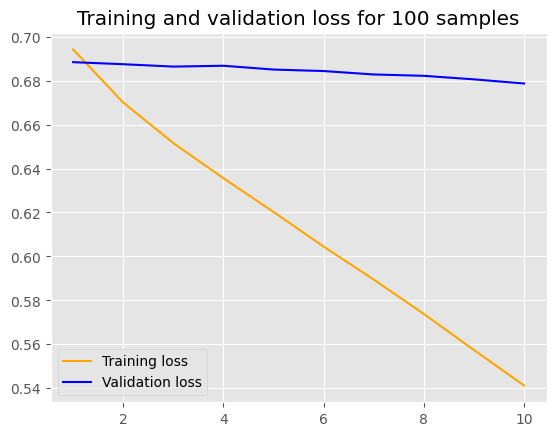

In [9]:
import matplotlib.pyplot as plt

# Training accuracy
train_accuracy = history1.history["acc"]
# Validation accuracy
valid_accuracy = history1.history["val_acc"]
# Training loss
train_loss = history1.history["loss"]
# Validation loss
valid_loss = history1.history["val_loss"]


epochs = range(1, len(train_accuracy ) + 1)

plt.plot(epochs, train_accuracy , "orange", label = "Training acc")
plt.plot(epochs, valid_accuracy , "b", label = "Validation acc")
plt.title("Training and validation accuracy for 100 samples")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, "orange", label = "Training loss")
plt.plot(epochs, valid_loss, "b", label = "Validation loss")
plt.title("Training and validation loss for 100 samples")
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

782/782 [==============================] - 1s 2ms/step - loss: 0.6952 - acc: 0.4984
Test loss: 0.6952235698699951
Test accuracy: 0.4984000027179718


***we will try to vary the training sample and by taking 3000 as of in a custom embedding layer***

In [11]:
no_features=10000
cutoff_length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=no_features)

x_train = pad_sequences(x_train, maxlen=cutoff_length)
x_test = pad_sequences(x_test, maxlen=cutoff_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:3000]
y_train = y_train[:3000]

In [12]:
model2 = Sequential()
model2.add(Embedding(10000, 8, input_length=cutoff_length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()
history2 = model2.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
75/75 [==============================] - 1s 6ms/step - loss: 0.6922 - acc: 0.5117 - val_loss: 0.6917 - val_acc: 0.5017
Epoch 2/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6749 - acc: 0.7113 - val_loss: 0.6898 - val_acc: 0.5417
Epoch 3/10
75/75 [==

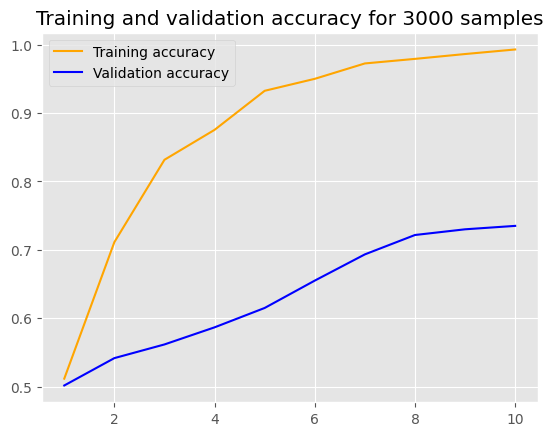

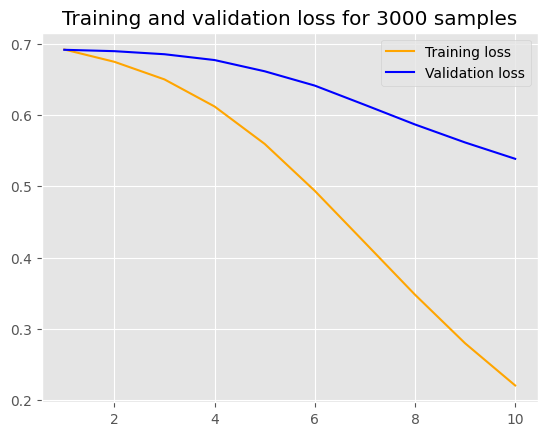

In [14]:
train_accuracy2 = history2.history['acc']
valid_accuracy2 = history2.history['val_acc']
train_loss2 = history2.history['loss']
valid_loss2 = history2.history['val_loss']

epochs = range(1, len(train_accuracy2) + 1)

plt.plot(epochs, train_accuracy2, 'orange', label='Training accuracy')
plt.plot(epochs, valid_accuracy2, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy for 3000 samples')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss2, 'orange', label='Training loss')
plt.plot(epochs, valid_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss for 3000 samples')
plt.legend()

plt.show()

In [15]:
test_loss2, test_accuracy2 = model2.evaluate(x_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_accuracy2)

782/782 [==============================] - 1s 2ms/step - loss: 0.5441 - acc: 0.7312
Test loss: 0.5440577864646912
Test accuracy: 0.7311599850654602


***try to vary the training sample and by taking 7000 as of in a custom embedding layer***

In [16]:
no_features=10000
cutoff_length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=no_features)

x_train = pad_sequences(x_train, maxlen=cutoff_length)
x_test = pad_sequences(x_test, maxlen=cutoff_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:7000]
y_train = y_train[:7000]

In [17]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=cutoff_length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
175/175 [==============================] - 1s 5ms/step - loss: 0.6884 - acc: 0.5555 - val_loss: 0.6773 - val_acc: 0.6464
Epoch 2/10
175/175 [==============================] - 1s 3ms/step - loss: 0.6247 - acc: 0.7684 - val_loss: 0.5885 - val_acc: 0.7614
Epoch 3/10
175/1

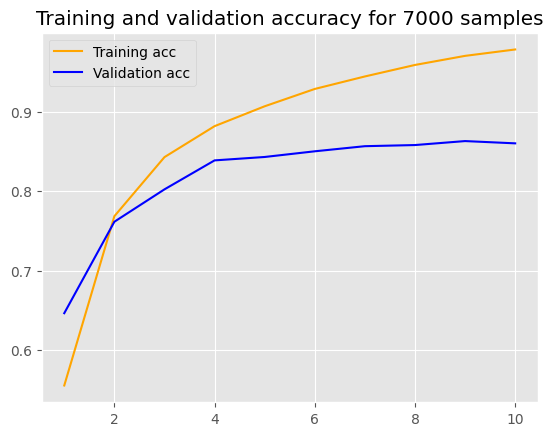

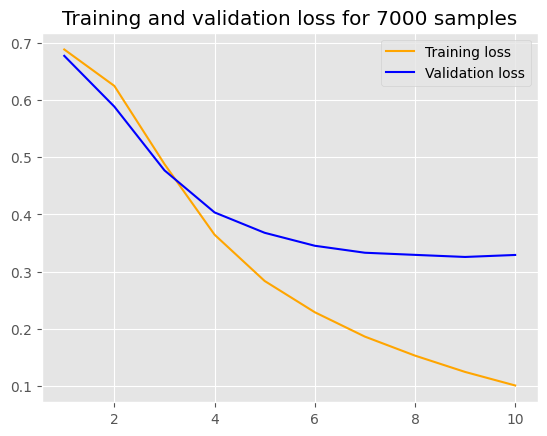

In [19]:
train_accuracy3 = history3.history["acc"]
valid_accuracy3 = history3.history["val_acc"]
train_loss3 = history3.history["loss"]
valid_loss3 = history3.history["val_loss"]

epochs = range(1, len(train_accuracy3) + 1)

plt.plot(epochs, train_accuracy3, "orange", label = "Training acc")
plt.plot(epochs, valid_accuracy3, "b", label = "Validation acc")
plt.title("Training and validation accuracy for 7000 samples")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss3, "orange", label = "Training loss")
plt.plot(epochs, valid_loss3, "b", label = "Validation loss")
plt.title("Training and validation loss for 7000 samples")
plt.legend()

plt.show()

In [20]:
test_loss3, test_accuracy3 = model3.evaluate(x_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_accuracy3)

782/782 [==============================] - 1s 2ms/step - loss: 0.3427 - acc: 0.8476
Test loss: 0.34274154901504517
Test accuracy: 0.8476399779319763


***try to vary the training sample and by taking 10000 as of in a custom embedding layer***

In [21]:
no_features=10000
cutoff_length=150
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=no_features)

x_train = pad_sequences(x_train, maxlen=cutoff_length)
x_test = pad_sequences(x_test, maxlen=cutoff_length)

texts = np.concatenate((x_train, x_test), axis=0)
labels = np.concatenate((x_train, x_test), axis=0)

x_train = x_train[:10000]
y_train = y_train[:10000]

In [22]:
model4 = Sequential()
model4.add(Embedding(10000, 8, input_length=cutoff_length))
model4.add(Flatten())
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model4.summary()
history4 = model4.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_3 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.6860 - acc: 0.5699 - val_loss: 0.6638 - val_acc: 0.6835
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5787 - acc: 0.7886 - val_loss: 0.5052 - val_acc: 0.8000
Epoch 3/10
250/2

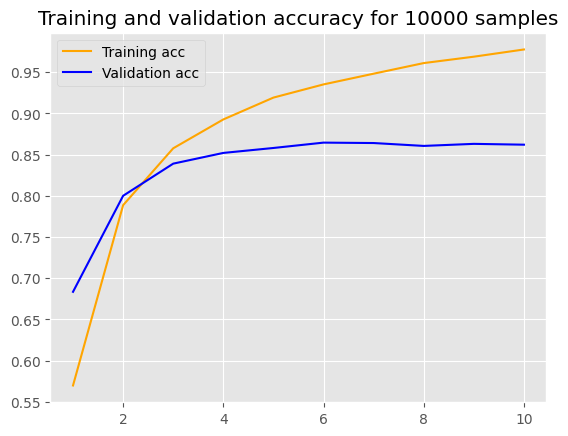

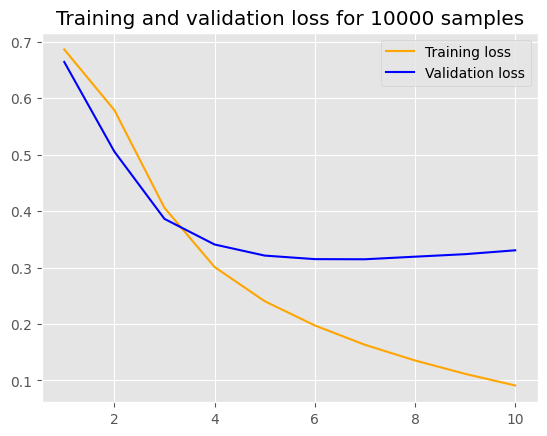

In [23]:
train_accuracy4 = history4.history["acc"]
valid_accuracy4 = history4.history["val_acc"]
train_loss4 = history4.history["loss"]
valid_loss4 = history4.history["val_loss"]

epochs = range(1, len(train_accuracy4) + 1)

plt.plot(epochs, train_accuracy4, "orange", label = "Training acc")
plt.plot(epochs, valid_accuracy4, "b", label = "Validation acc")
plt.title("Training and validation accuracy for 10000 samples")
plt.legend()
plt.figure()

plt.plot(epochs, train_loss4, "orange", label = "Training loss")
plt.plot(epochs, valid_loss4, "b", label = "Validation loss")
plt.title("Training and validation loss for 10000 samples")
plt.legend()

plt.show()

In [24]:
test_loss4, test_accuracy4 = model4.evaluate(x_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_accuracy4)

782/782 [==============================] - 1s 2ms/step - loss: 0.3371 - acc: 0.8584
Test loss: 0.3371291756629944
Test accuracy: 0.8583599925041199


the below code is to download, extract and remove files related stanford large movie review dataset

In [25]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  4690k      0  0:00:17  0:00:17 --:--:-- 10.1M


In [26]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(training, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

if there is insufficient training data we using pretrained word embeddings for making use of trained word embeds

***tokenizing the data***

In [27]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

cutoff_length2 = 150 # cut off review after 150 words
train_data = 100 # Training sample 100
valid_data = 10000 # Validation sample 10000
words = 10000 # Considering only the top 10000 words in the dataset

tokenizer1 = Tokenizer(num_words=words)
tokenizer1.fit_on_texts(texts)
sequences = tokenizer1.texts_to_sequences(texts)
word_index = tokenizer1.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=cutoff_length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)
# Splits data into training and validation sets, but shuffles since samples are ordered
# all negatives first, then all positive
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data] # (200, 100)
y_train = labels[:train_data] # shape (200,)
x_valid = data[train_data:train_data+valid_data] # shape (10000, 100)
y_valid = labels[train_data:train_data+valid_data] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [28]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glove_url = 'https://nlp.stanford.edu/data/glove.6B.zip'  # URL to download GloVe embeddings
glove_zip = requests.get(glove_url)

# Unzip the contents
with zipfile.ZipFile(BytesIO(glove_zip.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embeddings_index = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


***we trained 6B version of GloVe model by using Gigaword 5 and Wikipedia data***

In [29]:
emb_dim = 100

embedding_matrix = np.zeros((words, emb_dim ))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedd_vector

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(words, emb_dim , input_length=cutoff_length2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                480032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [35]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
4/4 [==============================] - 5s 1s/step - loss: 3.5604 - acc: 0.4800 - val_loss: 1.6036 - val_acc: 0.5042
Epoch 2/10
4/4 [==============================] - 3s 890ms/step - loss: 0.7367 - acc: 0.6200 - val_loss: 0.8644 - val_acc: 0.5005
Epoch 3/10
4/4 [==============================] - 2s 542ms/step - loss: 0.3862 - acc: 0.7900 - val_loss: 1.5360 - val_acc: 0.5044
Epoch 4/10
4/4 [==============================] - 3s 885ms/step - loss: 0.3235 - acc: 0.8500 - val_loss: 0.8137 - val_acc: 0.5005
Epoch 5/10
4/4 [==============================] - 2s 613ms/step - loss: 0.1404 - acc: 0.9700 - val_loss: 0.8710 - val_acc: 0.5124
Epoch 6/10
4/4 [==============================] - 3s 884ms/step - loss: 0.0924 - acc: 1.0000 - val_loss: 0.7310 - val_acc: 0.5352
Epoch 7/10
4/4 [==============================] - 3s 873ms/step - loss: 0.0551 - acc: 1.0000 - val_loss: 0.8550 - val_acc: 0.5255
Epoch 8/10
4/4 [==============================] - 3s 882ms/step - loss: 0.0344 - acc: 1.0000 

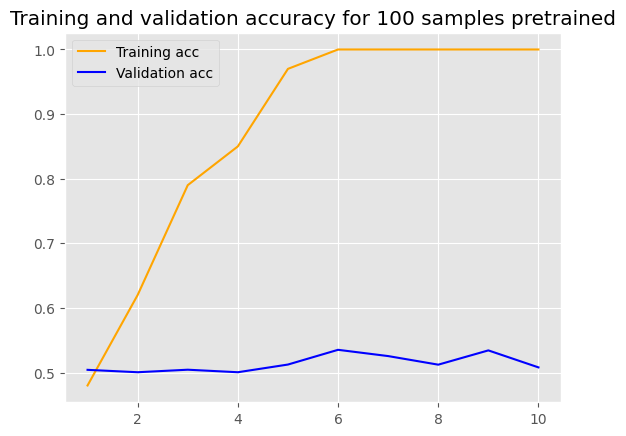

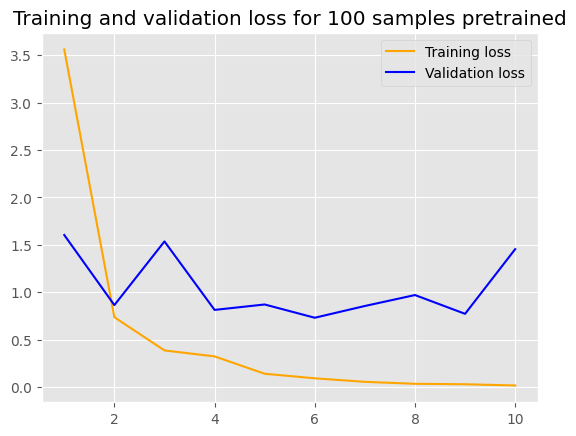

In [36]:
import matplotlib.pyplot as plt

training_accu = history.history['acc']
valid_accu = history.history['val_acc']
training_loss = history.history['loss']
valid_loss = history.history['val_loss']

epochs = range(1, len(training_accu) + 1)

plt.plot(epochs, training_accu, 'orange', label='Training acc')
plt.plot(epochs, valid_accu, 'b', label='Validation acc')
plt.title('Training and validation accuracy for 100 samples pretrained')
plt.legend()

plt.figure()

plt.plot(epochs, training_loss, 'orange', label='Training loss')
plt.plot(epochs, valid_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 100 samples pretrained')
plt.legend()

plt.show()

In [37]:
test_loss, test_accuracy= model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

782/782 [==============================] - 4s 6ms/step - loss: 1.6049 - acc: 0.4986
Test loss: 1.604877233505249
Test accuracy: 0.4986400008201599


In [39]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

cutoff_length2 = 150
train_data = 3000 # Training on 3000 samples
valid_data = 10000
words = 10000

tokenizer2 = Tokenizer(num_words=words)
tokenizer2.fit_on_texts(texts)
sequences = tokenizer2.texts_to_sequences(texts)
word_index = tokenizer2.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=cutoff_length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_valid = data[train_data:train_data+valid_data]
y_valid = labels[train_data:train_data+valid_data]
embedd_di = 100

embedd_matrix = np.zeros((words, embedd_di))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [40]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model11 = Sequential()
model11.add(Embedding(words, embedd_di, input_length=cutoff_length2))
model11.add(Flatten())
model11.add(Dense(32, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))
model11.summary()

model11.layers[0].set_weights([embedding_matrix])
model11.layers[0].trainable = False

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_5 (Flatten)         (None, 15000)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                480032    
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
model11.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history11 = model11.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))
model11.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
94/94 [==============================] - 6s 46ms/step - loss: 0.9170 - acc: 0.5213 - val_loss: 0.9565 - val_acc: 0.5032
Epoch 2/10
94/94 [==============================] - 4s 40ms/step - loss: 0.7608 - acc: 0.5847 - val_loss: 0.7457 - val_acc: 0.4978
Epoch 3/10
94/94 [==============================] - 2s 23ms/step - loss: 0.5848 - acc: 0.6973 - val_loss: 1.0789 - val_acc: 0.5022
Epoch 4/10
94/94 [==============================] - 2s 16ms/step - loss: 0.4660 - acc: 0.7770 - val_loss: 1.0562 - val_acc: 0.5039
Epoch 5/10
94/94 [==============================] - 2s 21ms/step - loss: 0.3934 - acc: 0.8343 - val_loss: 1.2354 - val_acc: 0.5066
Epoch 6/10
94/94 [==============================] - 2s 17ms/step - loss: 0.3110 - acc: 0.8787 - val_loss: 1.1899 - val_acc: 0.4999
Epoch 7/10
94/94 [==============================] - 2s 16ms/step - loss: 0.2394 - acc: 0.9080 - val_loss: 1.1323 - val_acc: 0.5062
Epoch 8/10
94/94 [==============================] - 2s 16ms/step - loss: 0.1939 - a

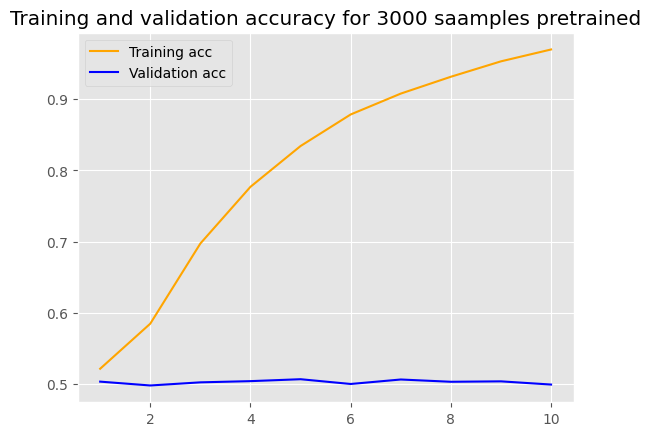

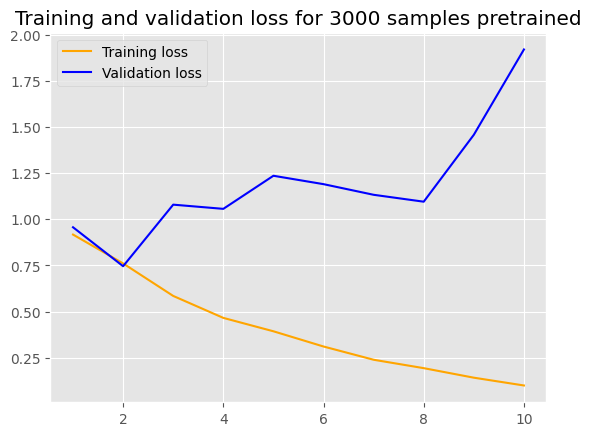

In [43]:
import matplotlib.pyplot as plt

accuracy11 = history11.history['acc']
valid_acc11 = history11.history['val_acc']
train_loss11 = history11.history['loss']
valid_loss11 = history11.history['val_loss']

epochs = range(1, len(accuracy11) + 1)

plt.plot(epochs, accuracy11, 'orange', label='Training acc')
plt.plot(epochs, valid_acc11, 'b', label='Validation acc')
plt.title('Training and validation accuracy for 3000 saamples pretrained')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss11, 'orange', label='Training loss')
plt.plot(epochs, valid_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss for 3000 samples pretrained')
plt.legend()

plt.show()

In [44]:
test_loss11, test_accuracy11 = model11.evaluate(x_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_accuracy11)

782/782 [==============================] - 4s 6ms/step - loss: 1.9400 - acc: 0.4995
Test loss: 1.9400279521942139
Test accuracy: 0.4995200037956238


In [45]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

cutoff_length2 = 150
train_data = 7000 #Training on 7000 samples
valid_data = 10000
words = 10000

tokenizer3 = Tokenizer(num_words=words)
tokenizer3.fit_on_texts(texts)
sequences = tokenizer3.texts_to_sequences(texts)
word_index = tokenizer3.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=cutoff_length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_valid = data[train_data:train_data+valid_data]
y_valid = labels[train_data:train_data+valid_data]
embedding_dim = 100

embedd_matrix = np.zeros((words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < words:
        if embedding_vector is not None:

            embedd_matrix[i] = embedding_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [46]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model12 = Sequential()
model12.add(Embedding(words, embedding_dim, input_length=cutoff_length2))
model12.add(Flatten())
model12.add(Dense(32, activation='relu'))
model12.add(Dense(1, activation='sigmoid'))
model12.summary()

model12.layers[0].set_weights([embedding_matrix])
model12.layers[0].trainable = False

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_8 (Dense)             (None, 32)                480032    
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history12 = model12.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))
model12.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
219/219 [==============================] - 11s 34ms/step - loss: 0.7371 - acc: 0.5121 - val_loss: 0.6932 - val_acc: 0.4983
Epoch 2/10
219/219 [==============================] - 4s 18ms/step - loss: 0.6940 - acc: 0.5670 - val_loss: 0.7073 - val_acc: 0.5016
Epoch 3/10
219/219 [==============================] - 5s 23ms/step - loss: 0.6286 - acc: 0.6441 - val_loss: 1.0446 - val_acc: 0.4983
Epoch 4/10
219/219 [==============================] - 5s 24ms/step - loss: 0.5684 - acc: 0.7097 - val_loss: 0.7674 - val_acc: 0.5015
Epoch 5/10
219/219 [==============================] - 6s 26ms/step - loss: 0.5049 - acc: 0.7650 - val_loss: 0.9264 - val_acc: 0.5049
Epoch 6/10
219/219 [==============================] - 6s 27ms/step - loss: 0.4426 - acc: 0.8011 - val_loss: 1.1148 - val_acc: 0.5055
Epoch 7/10
219/219 [==============================] - 6s 26ms/step - loss: 0.3838 - acc: 0.8361 - val_loss: 0.9801 - val_acc: 0.5115
Epoch 8/10
219/219 [==============================] - 5s 24ms/step -

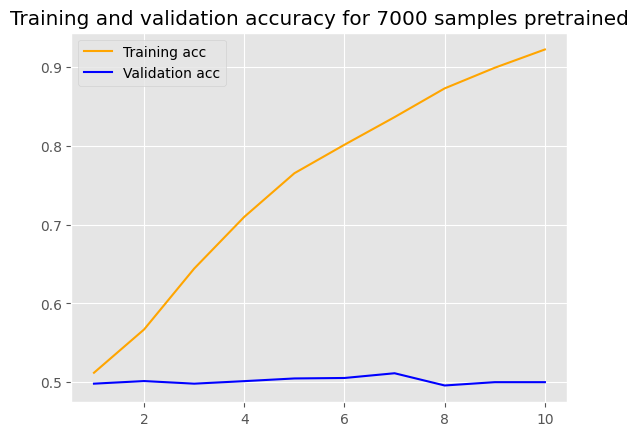

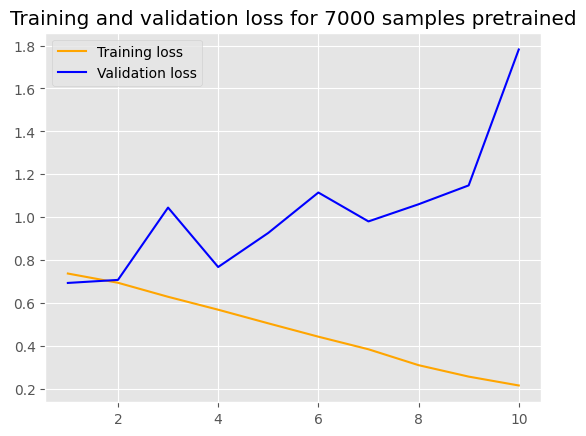

In [49]:
import matplotlib.pyplot as plt

acc12 = history12.history['acc']
val_acc12 = history12.history['val_acc']
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']

epochs = range(1, len(acc12) + 1)

plt.plot(epochs, acc12, 'orange', label='Training acc')
plt.plot(epochs, val_acc12, 'b', label='Validation acc')
plt.title('Training and validation accuracy for 7000 samples pretrained')
plt.legend()

plt.figure()

plt.plot(epochs, loss12, 'orange', label='Training loss')
plt.plot(epochs, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss for 7000 samples pretrained')
plt.legend()

plt.show()

In [51]:
test_loss12, test_accuracy12 = model12.evaluate(x_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_accuracy12)

782/782 [==============================] - 5s 6ms/step - loss: 1.7216 - acc: 0.5026
Test loss: 1.721590518951416
Test accuracy: 0.5026400089263916


In [53]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import numpy as np

cutoff_length2 = 150
train_data = 10000 # Trains on 10000 samples
valid_data = 10000
words = 10000

tokenizer4 = Tokenizer(num_words=words)
tokenizer4.fit_on_texts(texts)
sequences = tokenizer4.texts_to_sequences(texts)
word_index = tokenizer4.word_index
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=cutoff_length2)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:train_data]
y_train = labels[:train_data]
x_valid = data[train_data:train_data+valid_data]
y_valid = labels[train_data:train_data+valid_data]
embedd_dim = 100

embedd_matrix = np.zeros((words, embedd_dim))
for word, i in word_index.items():
    embedd_vector = embeddings_index.get(word)
    if i < words:
        if embedd_vector is not None:

            embedd_matrix[i] = embedd_vector

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [54]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model13 = Sequential()
model13.add(Embedding(words, embedding_dim, input_length=cutoff_length2))
model13.add(Flatten())
model13.add(Dense(32, activation='relu'))
model13.add(Dense(1, activation='sigmoid'))
model13.summary()

model13.layers[0].set_weights([embedding_matrix])
model13.layers[0].trainable = False

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_7 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1480065 (5.65 MB)
Trainable params: 1480065 (5.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history13 = model13.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_valid, y_valid))
model13.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
313/313 [==============================] - 12s 27ms/step - loss: 0.7193 - acc: 0.5041 - val_loss: 0.6932 - val_acc: 0.4939
Epoch 2/10
313/313 [==============================] - 6s 18ms/step - loss: 0.7011 - acc: 0.5072 - val_loss: 0.6934 - val_acc: 0.4939
Epoch 3/10
313/313 [==============================] - 6s 21ms/step - loss: 0.6974 - acc: 0.5080 - val_loss: 0.6932 - val_acc: 0.4934
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 0.6849 - acc: 0.5418 - val_loss: 0.6996 - val_acc: 0.4964
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 0.6486 - acc: 0.6178 - val_loss: 0.7244 - val_acc: 0.5036
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 0.5688 - acc: 0.6984 - val_loss: 0.9176 - val_acc: 0.4918
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 0.4849 - acc: 0.7625 - val_loss: 0.8995 - val_acc: 0.5052
Epoch 8/10
313/313 [==============================] - 6s 20ms/step -

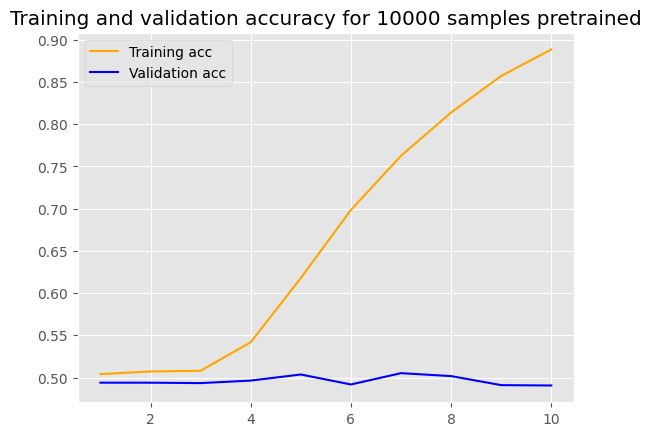

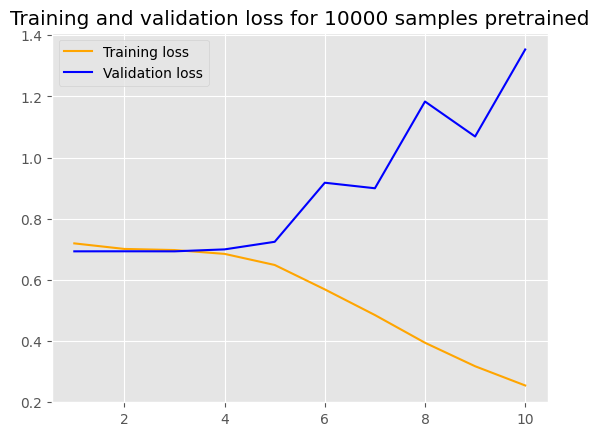

In [56]:
import matplotlib.pyplot as plt

accuracy13 = history13.history['acc']
valid_acc13 = history13.history['val_acc']
loss13 = history13.history['loss']
valid_loss13 = history13.history['val_loss']

epochs = range(1, len(accuracy13) + 1)

plt.plot(epochs, accuracy13, 'orange', label='Training acc')
plt.plot(epochs, valid_acc13, 'b', label='Validation acc')
plt.title('Training and validation accuracy for 10000 samples pretrained')
plt.legend()

plt.figure()

plt.plot(epochs, loss13, 'orange', label='Training loss')
plt.plot(epochs, valid_loss13, 'b', label='Validation loss')
plt.title('Training and validation loss for 10000 samples pretrained')
plt.legend()

plt.show()

In [57]:
test_loss13, test_accuracy13 = model13.evaluate(x_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_accuracy13)

782/782 [==============================] - 6s 7ms/step - loss: 1.3448 - acc: 0.4964
Test loss: 1.3447637557983398
Test accuracy: 0.49636000394821167
